# Transformaciones de Contraste

Se realizan mejoras en el constraste de la imágenes del conjunto de datos para intentar mejorar el rendimiento de clasificación de un modelo de red neuronal ResNet50, utilizado para la clasificación de los aguacates en las diferentes fases de maduración.

In [3]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [7]:
BASE_DIR = './data'

avocados_train = []
for dirname, _, filenames in os.walk(f'{BASE_DIR}/train'):
    for filename in filenames:
        try:
            avocados_train.append(cv.cvtColor(cv.imread(os.path.join(dirname, filename)), cv.COLOR_BGR2RGB))
        except Exception as e:
            print(f'Unable to load: {filename} by exception \n {e}')

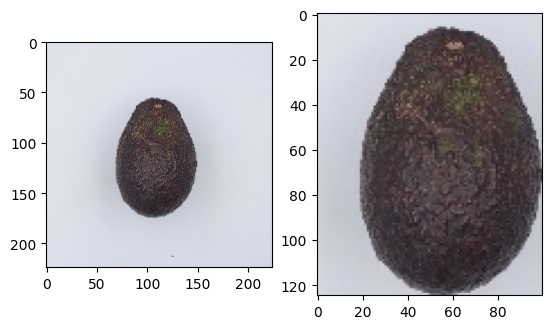

In [21]:
plt.subplot(1, 2, 1)
plt.imshow(avocados_train[0])
plt.subplot(1, 2, 2)
plt.imshow(avocados_train[0][50:175, 50:150, :])
plt.show()

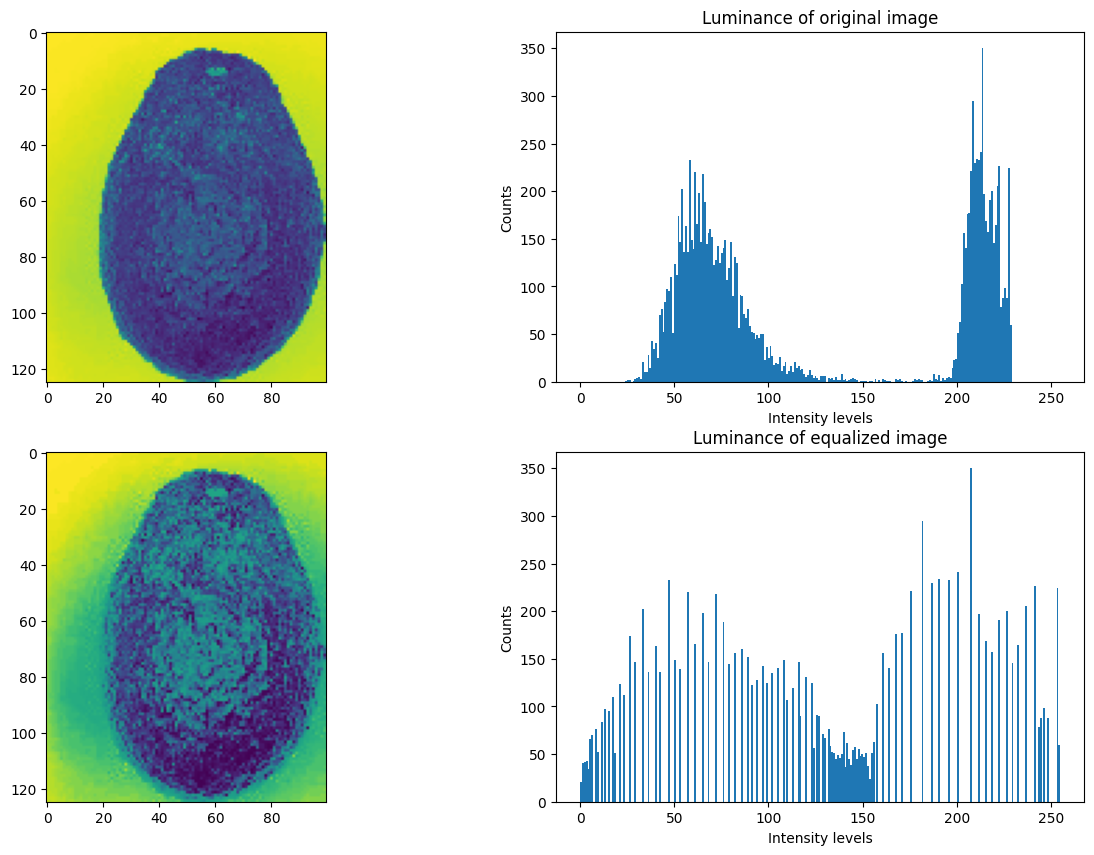

In [23]:
# Convert RGB to LAB space. For L layer.
temp = cv.cvtColor(avocados_train[0][50:175, 50:150, :], cv.COLOR_RGB2LAB)
l, a, b = cv.split(temp)

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(l)

# Compute histogram of L layer
plt.subplot(2, 2, 2)
plt.hist(np.ravel(l), bins=256, range=(0, 255))
plt.xlabel('Intensity levels')
plt.ylabel('Counts')
plt.title('Luminance of original image')

# Apply histogram equalization of image
temp2 = cv.equalizeHist(l)
plt.subplot(2, 2, 3)
plt.imshow(temp2)

# Compute histogram of L layer
plt.subplot(2, 2, 4)
plt.hist(np.ravel(temp2), bins=256, range=(0, 255))
plt.xlabel('Intensity levels')
plt.ylabel('Counts')
plt.title('Luminance of equalized image')
plt.show()